In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np 
import scipy.stats as stats
import scipy.optimize

%matplotlib inline

In [2]:
blues = sns.color_palette('Blues', 9)
reds = sns.color_palette('Reds', 9)
greens = sns.color_palette('Greens', 9)
oranges = sns.color_palette('Oranges', 9)
grays = sns.color_palette('Greys', 9)
purples = sns.color_palette('Purples', 9)
prs = sns.color_palette('PRGn', 9)
tanteals = sns.color_palette('BrBG', 9)
pinkgreens = sns.color_palette('PiYG', 9)[::-1]


bw = {'axis.labelcolor': 'white', 'xtick.color': 'white', 'ytick.color': 'white',
     'grid.color': 'white', 'axes.edgecolor': 'white', 'axes.facecolor': 'black',
     'text.color': 'white', 'axes.labelcolor': 'white', 'figure.facecolor' : 'black',
     'xtick.major.size': 5.0, 'xtick.minor.size': 5.0, 
      'ytick.major.size': 5.0, 'ytick.minor.size': 5.0, 'axes.linewidth': 1.0}
bw_tickless = {'axis.labelcolor': 'white', 'grid.color': 'white', 
               'axes.edgecolor': 'white', 'axes.facecolor': 'black', 'text.color': 'white', 
               'axes.labelcolor': 'white', 'figure.facecolor' : 'black', 'axes.linewidth': 1.0,
              'xtick.color': 'white', 'ytick.color': 'white'}

## Standards

In [3]:
# r: reagent-only standard; glucose assay reagent + H2O (in lieu of sample)
# H2O: sample-only standard; H2O (in lieu of reagent) + sample
# A: the actual glucose assay reagent + samples; A340 nm signal
r_standard_0704 = 0.007
h2o_standard_0704 = [-0.005, -0.001, -0.001, -0.003, -0.002]
A_standard_0704 = [0.303, 0.161, 0.085, 0.047, 0.026]

In [4]:
r_standard_0705 = 0.004
h2o_standard_0705 = [-0.003, -0.006, -0.005, -0.007, -0.004]
A_standard_0705 = [0.288, 0.162, 0.084, 0.045, 0.024]

In [5]:
r_standard_0706 = 0.005
h2o_standard_0706 = [-0.001, -0.004, -0.003, -0.004, -0.005]
A_standard_0706 = [0.259, 0.161, 0.085, 0.047, 0.024]

In [6]:
r_standard_0709 = 0.008
h2o_standard_0709 = [-0.003, -0.007, 0.004, -0.003, 0.000]
A_standard_0709 = [0.343, 0.174, 0.086, 0.043, 0.026]

In [7]:
# calculate signals minus noise from reagent and noise from sample

deltaA_standard_0704 = [A_standard_0704[x] - h2o_standard_0704[x] - r_standard_0704 for 
                        x in range(len(A_standard_0704))]

deltaA_standard_0705 = [A_standard_0705[x] - h2o_standard_0705[x] - r_standard_0705 for 
                        x in range(len(A_standard_0705))]

deltaA_standard_0706 = [A_standard_0706[x] - h2o_standard_0706[x] - r_standard_0706 for 
                        x in range(len(A_standard_0706))]

deltaA_standard_0709 = [A_standard_0709[x] - h2o_standard_0709[x] - r_standard_0709 for 
                        x in range(len(A_standard_0709))]

In [8]:
# actual glucose concentrations of standards, in mg/ml
standards_real = [1.0, 1.0/2, 1.0/4, 1.0/8, 1.0/16]

In [9]:
# calculating inferred glucose concentrations, in mg/ml, from A340 nm signal
# calculation: A340 * total volume * F (dilution factor) * 0.029 / sample volume * 10 (for nanodrop setting)

standards_calc_0704 = [(x * 0.550 * 1 * 0.029 * 10 / 0.050) for x in deltaA_standard_0704]
standards_calc_0705 = [(x * 0.225 * 1 * 0.029 * 10 / 0.025) for x in deltaA_standard_0705]
standards_calc_0706 = [(x * 0.225 * 1 * 0.029 * 10 / 0.025) for x in deltaA_standard_0706]
standards_calc_0709 = [(x * 0.225 * 1 * 0.029 * 10 / 0.025) for x in deltaA_standard_0709]

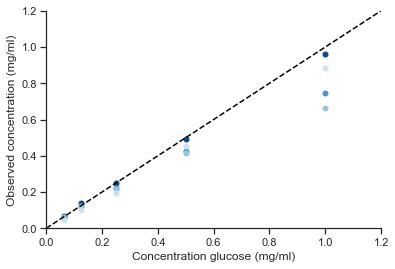

In [10]:
sns.set_style('ticks')
sns.set_context('notebook')

f, ax = plt.subplots()
plt.scatter(standards_real, standards_calc_0704, marker = '.', color = blues[8], s = 100)
plt.scatter(standards_real, standards_calc_0705, marker = '.', color = blues[5], s = 100)
plt.scatter(standards_real, standards_calc_0706, marker = '.', color = blues[3], s = 100)
plt.scatter(standards_real, standards_calc_0709, marker = '.', color = blues[1], s = 100)


xplot = np.linspace(0, 1.5, 100)
plt.plot(xplot, xplot, color = 'black', linestyle = '--')

ax.set_xlim(0, 1.2)
ax.set_ylim(0, 1.2)

ax.set_xlabel('Concentration glucose (mg/ml)')
ax.set_ylabel ('Observed concentration (mg/ml)')

sns.despine()

In [11]:
standards_all = standards_calc_0704 + standards_calc_0705 + standards_calc_0706 + standards_calc_0709
standards_real_all = standards_real * 4

In [17]:
# linear fit to data from glucose standards

[m_standard, b_standard, r_standard, p_standard, stderr_standard] = scipy.stats.linregress(standards_all,
                                                                                           standards_real_all)

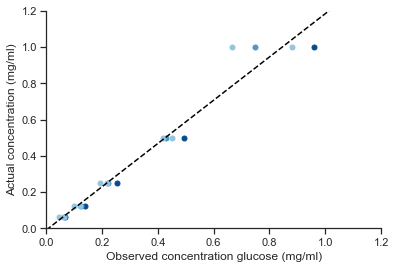

In [13]:
sns.set_style('ticks')
sns.set_context('notebook')

f, ax = plt.subplots()
plt.scatter(standards_calc_0704, standards_real, marker = '.', color = blues[8], s = 100)
plt.scatter(standards_calc_0705, standards_real, marker = '.', color = blues[5], s = 100)
plt.scatter(standards_calc_0706, standards_real, marker = '.', color = blues[3], s = 100)
plt.scatter(standards_calc_0709, standards_real, marker = '.', color = blues[3], s = 100)

xplot = np.linspace(0, 1.5, 100)
plt.plot(xplot, (xplot*m_standard) + b_standard, color = 'black', linestyle = '--')

ax.set_xlim(0, 1.2)
ax.set_ylim(0, 1.2)

ax.set_xlabel('Observed concentration glucose (mg/ml)')
ax.set_ylabel ('Actual concentration (mg/ml)')

sns.despine()

In [14]:
m_standard

1.193653657208405

## Data import

In [18]:
df_qs = pd.read_csv('glucose_uptake_rates.csv', sep = '\t')

In [20]:
# q: glucose depletion rate from media/uptake rate from cells, mg/cell/hr
# q_norm: glucose uptake normalized to doubling time, mg/cell/gen
# q_ng: glucose uptake in ng, ng/cell/hr
# q_norm_ng: glucose uptake in ng, normalized to doubling time, ng/cell/gen
df_qs

,strain,q,q_norm,q_ng,q_norm_ng
0,yLB1,9.191800e-08,1.322640e-07,0.091918,0.132264
1,yLB73,5.346231e-08,1.234055e-07,0.053462,0.123405
2,yLB145,4.001311e-08,6.499628e-08,0.040013,0.064996
3,yLB167,4.865532e-08,7.640448e-08,0.048655,0.076404
4,yLB181,4.133067e-08,6.374594e-08,0.041331,0.063746
5,yLB194,2.697999e-08,7.158493e-08,0.026980,0.071585
6,yLB232,1.383002e-08,3.028185e-08,0.013830,0.030282
7,yLB1,6.504067e-08,9.358928e-08,0.065041,0.093589
8,yLB73,7.376604e-08,1.702720e-07,0.073766,0.170272
9,yLB145,1.198882e-08,1.947434e-08,0.011989,0.019474


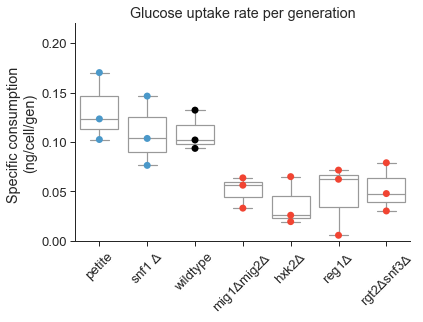

In [22]:
strain_palette = {'yLB1': 'black', 'yLB73': blues[5], 'yLB167': blues[5],
                 'yLB145': reds[5], 'yLB181': reds[5], 'yLB194': reds[5],
                 'yLB232' : reds[5]}



sns.set_style('ticks')
sns.set_context('paper', font_scale = 1.5)

f, ax = plt.subplots()

sns.boxplot(x = 'strain', y = 'q_norm_ng', data = df_qs, color = 'white',
            order = ['yLB73', 'yLB167', 'yLB1', 'yLB181', 'yLB145', 'yLB194', 'yLB232'])
sns.swarmplot(x = 'strain', y = 'q_norm_ng', data = df_qs, palette = strain_palette,
              order = ['yLB73', 'yLB167', 'yLB1', 'yLB181', 'yLB145', 'yLB194', 'yLB232'], s = 7)


ax.set_ylim(0, 2.2e-1)

plt.xticks(rotation = 45)
ax.set_xlabel(None)
ax.set_ylabel('Specific consumption \n(ng/cell/gen)') 
ax.set_xticklabels(['petite', 'snf1 $\mathregular{\Delta}$', 'wildtype',
                    'mig1$\mathregular{\Delta}$mig2$\mathregular{\Delta}$', 'hxk2$\mathregular{\Delta}$',
                    'reg1$\mathregular{\Delta}$', 'rgt2$\mathregular{\Delta}$snf3$\mathregular{\Delta}$']);

plt.title('Glucose uptake rate per generation')
sns.despine()

#plt.savefig('glucose_uptake_gen.eps', dpi = 300, transparent = True, bbox_inches = 'tight')

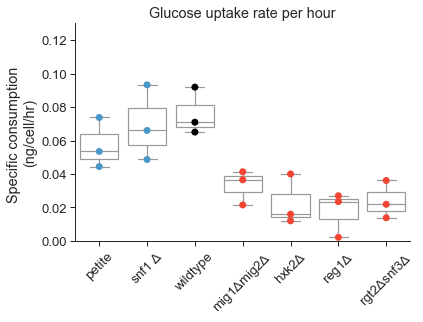

In [23]:
strain_palette = {'yLB1': 'black', 'yLB73': blues[5], 'yLB167': blues[5],
                 'yLB145': reds[5], 'yLB181': reds[5], 'yLB194': reds[5],
                 'yLB232' : reds[5]}



sns.set_style('ticks')
sns.set_context('paper', font_scale = 1.5)

f, ax = plt.subplots()

sns.boxplot(x = 'strain', y = 'q_ng', data = df_qs, color = 'white',
            order = ['yLB73', 'yLB167', 'yLB1', 'yLB181', 'yLB145', 'yLB194', 'yLB232'])
sns.swarmplot(x = 'strain', y = 'q_ng', data = df_qs, palette = strain_palette,
              order = ['yLB73', 'yLB167', 'yLB1', 'yLB181', 'yLB145', 'yLB194', 'yLB232'], s = 7)


ax.set_ylim(0, 1.3e-1)

plt.xticks(rotation = 45)
ax.set_xlabel(None)
ax.set_ylabel('Specific consumption \n(ng/cell/hr)') 
ax.set_xticklabels(['petite', 'snf1 $\mathregular{\Delta}$', 'wildtype',
                    'mig1$\mathregular{\Delta}$mig2$\mathregular{\Delta}$', 'hxk2$\mathregular{\Delta}$',
                    'reg1$\mathregular{\Delta}$', 'rgt2$\mathregular{\Delta}$snf3$\mathregular{\Delta}$']);

plt.title('Glucose uptake rate per hour')
sns.despine()

#plt.savefig('glucose_uptake_hr.eps', dpi = 300, transparent = True, bbox_inches = 'tight')

## t-tests

In [32]:
strainnos = ['yLB73', 'yLB167', 'yLB181', 'yLB145', 'yLB194', 'yLB232']
strainnames = ['petite', 'snf1', 'mig1mig2', 'hxk2', 'reg1', 'rgt2snf3']

print('P-values, rates normalized by doubling time:')
for s in range(len(strainnos)):
    pp = stats.ttest_ind(df_qs[df_qs['strain'] == 'yLB1']['q_norm_ng'],
               df_qs[df_qs['strain'] == strainnos[s]]['q_norm_ng'])
    print('Wt vs. ' + strainnames[s] + ': p=' + str(round(pp[1], 3)))

P-values, rates normalized by doubling time
Wt vs. petite: p=0.382
Wt vs. snf1: p=0.985
Wt vs. mig1mig2: p=0.018
Wt vs. hxk2: p=0.017
Wt vs. reg1: p=0.057
Wt vs. rgt2snf3: p=0.037


In [33]:
strainnos = ['yLB73', 'yLB167', 'yLB181', 'yLB145', 'yLB194', 'yLB232']
strainnames = ['petite', 'snf1', 'mig1mig2', 'hxk2', 'reg1', 'rgt2snf3']

print('P-values, rates per unit time:')
for s in range(len(strainnos)):
    pp = stats.ttest_ind(df_qs[df_qs['strain'] == 'yLB1']['q_ng'],
               df_qs[df_qs['strain'] == strainnos[s]]['q_ng'])
    print('Wt vs. ' + strainnames[s] + ': p=' + str(round(pp[1], 3)))

P-values, rates per unit time:
Wt vs. petite: p=0.19
Wt vs. snf1: p=0.687
Wt vs. mig1mig2: p=0.013
Wt vs. hxk2: p=0.011
Wt vs. reg1: p=0.007
Wt vs. rgt2snf3: p=0.008
